# Optimizations of ZOEE to HadCM3, CESM, Pages2k

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from ZOEE.modules.configuration import importer, add_sellersparameters, parameterinterpolatorstepwise
from ZOEE.modules.variables import variable_importer, Vars, Base
from ZOEE.modules.optimization import optimization, ZOEE_optimization
#from ZOEE import update_plotstyle, moving_average
from ZOEE.modules.rk4 import rk4alg
#import matplotlib
#update_plotstyle()
#matplotlib.rcParams['lines.linewidth']=1.1

## General optimization setup

In [2]:
Lat_10,ZMT_10=np.loadtxt('Experiments/ERA5/ERA_1961_1990_10deg_ZMTanomaly.txt',delimiter=',')

In [10]:
"""Decleration of optimization configuration"""
grid=np.linspace(-85,85,18)
optimization_setup = optimization(mode='Coupled',
                            target=None,
                            ZMT_response=True, 
                            GMT_response=True,
                            num_steps=20,
                            num_data=12000,
                            gamma0=1e-8,
                            cost_function_type='LeastSquare',
                            cost_ratio=0.2,
                            ZMT=ZMT_10+288.15,
                            GMT=288.15,
                            precision=0,
                            grid=grid)

"""Declaration of parameter setup, with initial parameters, parameter boundaries and 
the parameter pertubation to estimate the cost function gradient"""
P0=np.array([70*4.2e6,200,1.9,1.165,1.165,1.165])
#P0=Get_PGamma[0]
Pmin=np.array([1*4.2e6,170,1.3,0.9,0.9,0.9])
Pmax=np.array([100*4.2e6,240,2.5,1.3,1.3,1.3])
P_pert_ratio=1/10000
optimization_setup.give_parameters(P0,Pmin,Pmax,P_pert_ratio)
        

# HadCM3

In [11]:
HadCM3_GMT=np.loadtxt('Experiments/HadCM3/HadCM3_850_1850_anomaly.txt',delimiter=',')

In [ ]:
"""Import the configuration that is required to run your specific model"""

config_HadCM3=importer('Experiments/HadCM3/Config_HadCM3.ini')
parallel_config = {'number_of_parameters': 6, 'number_of_cycles': 1,'number_of_parallels': 13}
variable_importer(config_HadCM3,initialZMT=False,parallel=True,parallel_config=parallel_config)
config_HadCM3,Sellers=add_sellersparameters(config_HadCM3, parameterinterpolatorstepwise,\
                                            'ZOEE/config/SellersParameterization.ini',4,2,True,True)


"""Import the class of your model that has to be defined in ZOEE.modules.optimization. And give it whatever 
configuration it requires"""

parameter_labels=[['eqparam','c_ao'],['func3','a'],['func3','b'],['func4','factor_oc'],['func4','factor_kwv'],['func4','factor_kair']]
parameter_levels=np.array([None,None,None,None,None,None])
elevation=-0.0065*np.array(Sellers[1][1])
ZOEE_HadCM3 = ZOEE_optimization(6,parameter_labels,parameter_levels,True,elevation,monthly=True)
#model_setup=[2,'ZMT',parameter_labels,parameter_levels,elevation,True]

"""Execture optimize to start the optimization, giving it your model imported in the step before and configuration
required to run your model"""
optimization_setup.target={'ZMT':ZMT_10,'GMT':HadCM3_GMT[1]}
optimization_setup.num_data=12000
optimization_setup.response=False
F_HadCM3, dF_HadCM3, P_HadCM3, Ptrans_HadCM3, gamma_HadCM3, data_HadCM3=optimization_setup.optimize(ZOEE_HadCM3,config_HadCM3)

Loading Configuration from: Experiments/HadCM3/Config_HadCM3.ini
Loading Parameters from: ZOEE_transition/Data/SellersParameterization.ini


HBox(children=(IntProgress(value=0, max=20), HTML(value='')))

Iteration no.0
Starting controlrun with a temperature accuracy of 0.001 K on the GMT over 1000 datapoints.


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

/home/benni/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


Eq. State reached after 50049 steps, within 254.42891430854797 seconds


HBox(children=(IntProgress(value=0, max=365000), HTML(value='')))

[496.93223164 496.94398963 496.92045868 496.91842165 496.94830199
 497.06083538 496.80360075 496.93292353 496.93166703 496.93250016
 496.93196313 496.93461795 496.92970544]
1e-08
[2.94000489e+08 1.99999895e+02 1.90001543e+00 1.16500003e+00
 1.16500001e+00 1.16500010e+00]
Iteration no.1
Starting controlrun with a temperature accuracy of 0.001 K on the GMT over 1000 datapoints.


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Eq. State reached after 50049 steps, within 253.54593014717102 seconds


HBox(children=(IntProgress(value=0, max=365000), HTML(value='')))

[496.91531877 496.92719302 496.90365613 496.90160413 496.9315219
 497.04396288 496.78688039 496.91590909 496.91480795 496.915548
 496.91508954 496.91788707 496.91283135]
4.9617606248589405e-06
[2.94243284e+08 1.99947940e+02 1.90766892e+00 1.16501095e+00
 1.16500456e+00 1.16505027e+00]
Iteration no.2
Starting controlrun with a temperature accuracy of 0.001 K on the GMT over 1000 datapoints.


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Eq. State reached after 50049 steps, within 241.84532952308655 seconds


HBox(children=(IntProgress(value=0, max=365000), HTML(value='')))

[488.67511958 488.68694605 488.66339047 488.64909153 488.70278094
 488.79792429 488.55240264 488.67572635 488.67450031 488.67540303
 488.67483613 488.67814615 488.67216081]
1.5996308145612228e-05
[2.95026656e+08 1.99647348e+02 1.93123356e+00 1.16505018e+00
 1.16502270e+00 1.16524176e+00]
Iteration no.3
Starting controlrun with a temperature accuracy of 0.001 K on the GMT over 1000 datapoints.


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Eq. State reached after 49048 steps, within 239.2406108379364 seconds


HBox(children=(IntProgress(value=0, max=365000), HTML(value='')))

In [ ]:
np.savetxt('Experiments/Output/HadCM3_P_20_resp_2.txt',[P_HadCM3[-1],np.tile(gamma_HadCM3[-1],6)],delimiter=',')
np.savetxt('Experiments/Output/HadCM3_F_20_resp_2.txt',F_HadCM3,delimiter=',')
np.savetxt('Experiments/Output/HadCM3_F_20_resp_2.txt',dF_HadCM3,delimiter=',')
np.savetxt('Experiments/Output/HadCM3_ZMT_20_resp_2.txt',data_HadCM3[0][:,0],delimiter=',')
np.savetxt('Experiments/Output/HadCM3_GMT_20_resp_2.txt',data_HadCM3[1][:,0],delimiter=',')

# CESM

In [ ]:
CESM_GMT=np.loadtxt('Experiments/CESM/CESM_850_1850_response.txt',delimiter=',')

In [ ]:
"""Import the configuration that is required to run your specific model"""

config_CESM=importer('Experiments/CESM/Config_CESM.ini')
parallel_config = {'number_of_parameters': 6, 'number_of_cycles': 1,'number_of_parallels': 13}
variable_importer(config_CESM,initialZMT=False,parallel=True,parallel_config=parallel_config)
config_CESM,Sellers=add_sellersparameters(config_CESM, parameterinterpolatorstepwise,\
                                            'ZOEE/config/SellersParameterization.ini',4,2,True,True)


"""Import the class of your model that has to be defined in ZOEE.modules.optimization. And give it whatever 
configuration it requires"""

parameter_labels=[['eqparam','c_ao'],['func3','a'],['func3','b'],['func4','factor_oc'],['func4','factor_kwv'],['func4','factor_kair']]
parameter_levels=np.array([None,None,None,None,None,None])
elevation=-0.0065*np.array(Sellers[1][1])
ZOEE_CESM = ZOEE_optimization(6,parameter_labels,parameter_levels,True,elevation,monthly=True)
#model_setup=[2,'ZMT',parameter_labels,parameter_levels,elevation,True]

"""Execture optimize to start the optimization, giving it your model imported in the step before and configuration
required to run your model"""
optimization_setup.target={'ZMT':ZMT_10,'GMT':CESM_GMT[1]}
#optimization_setup.num_steps=2
F_CESM, dF_CESM, P_CESM, Ptrans_CESM, gamma_CESM, data_CESM=optimization_setup.optimize(ZOEE_CESM,config_CESM)

In [ ]:
np.savetxt('Experiments/Output/CESM_P_20_resp_2.txt',[P_CESM[-1],np.tile(gamma_CESM[-1],6)],delimiter=',')
np.savetxt('Experiments/Output/CESM_F_20_resp_2.txt',F_CESM,delimiter=',')
np.savetxt('Experiments/Output/CESM_F_20_resp_2.txt',dF_CESM,delimiter=',')
np.savetxt('Experiments/Output/CESM_ZMT_20_resp_2.txt',data_CESM[0][:,0],delimiter=',')
np.savetxt('Experiments/Output/CESM_GMT_20_resp_2.txt',data_CESM[1][:,0],delimiter=',')

# Pages2k

In [ ]:
Pages_GMT=np.loadtxt('Experiments/Pages2k/Pages2k_850_1850.txt',delimiter=',')

In [ ]:
"""Import the configuration that is required to run your specific model"""

config_Pages=importer('Experiments/Pages2k/Config_Pages.ini')
parallel_config = {'number_of_parameters': 6, 'number_of_cycles': 1,'number_of_parallels': 13}
variable_importer(config_Pages,initialZMT=False,parallel=True,parallel_config=parallel_config)
config_Pages,Sellers=add_sellersparameters(config_Pages, parameterinterpolatorstepwise,\
                                            'ZOEE/config/SellersParameterization.ini',4,2,True,True)


"""Import the class of your model that has to be defined in ZOEE.modules.optimization. And give it whatever 
configuration it requires"""

parameter_labels=[['eqparam','c_ao'],['func3','a'],['func3','b'],['func4','factor_oc'],['func4','factor_kwv'],['func4','factor_kair']]
parameter_levels=np.array([None,None,None,None,None,None])
elevation=-0.0065*np.array(Sellers[1][1])
ZOEE_Pages = ZOEE_optimization(6,parameter_labels,parameter_levels,True,elevation,monthly=False)
#model_setup=[2,'ZMT',parameter_labels,parameter_levels,elevation,True]

"""Execture optimize to start the optimization, giving it your model imported in the step before and configuration
required to run your model"""
optimization_setup.target={'ZMT':ZMT_10,'GMT':Pages_GMT[1]}
optimization_setup.num_data=1000
#optimization_setup.response=True
F_Pages, dF_Pages, P_Pages, Ptrans_Pages, gamma_Pages, data_Pages=optimization_setup.optimize(ZOEE_Pages,config_Pages)

In [ ]:
np.savetxt('Experiments/Output/Pages_P_20_resp_2.txt',[P_Pages[-1],np.tile(gamma_Pages[-1],6)],delimiter=',')
np.savetxt('Experiments/Output/Pages_F_20_resp_2.txt',F_Pages,delimiter=',')
np.savetxt('Experiments/Output/Pages_F_20_resp_2.txt',dF_Pages,delimiter=',')
np.savetxt('Experiments/Output/Pages_ZMT_20_resp_2.txt',data_Pages[0][:,0],delimiter=',')
np.savetxt('Experiments/Output/Pages_GMT_20_resp_2.txt',data_Pages[1][:,0],delimiter=',')

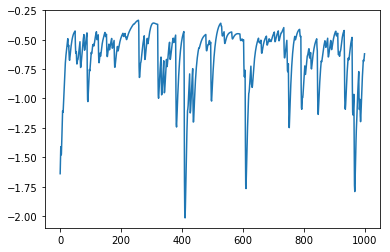

In [24]:
plt.plot(data_Pages[1][19][0])

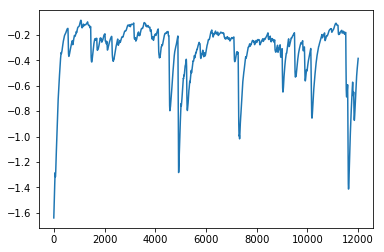

In [25]:
plt.plot(data_CESM[1][19][0])

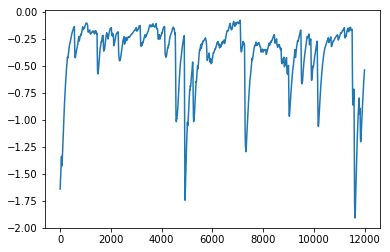

In [26]:
plt.plot(data_HadCM3[1][19][0])